## Using your sampler for a real problem where a grid would have been really painful.

### Intro: Gravitational microlensing

If you are a non-astronomer, you may or may not be familiar with **gravitational lensing**. Essentially, gravitational lensing occurs whenever a bright object appears behind a massive, dense object like a black hole or cluster of galaxies. This massive object is called the "lens", and gravity from the lens bends the light from the object in back. The result is that -- to observers on Earth -- the background object can appear distorted, and its light magnified.

**Example:** Below is a real image of gravitational lensing. Light from a blue spiral galaxy in the background is being magnified and warped by a red elliptical galaxy closer to us.

<table>
    <tr>
        <td><img src="figures/A_Horseshoe_Einstein_Ring_from_Hubble.JPG" width=30%></td>
    </tr>
</table>

For astronomers, it is easiest to detect gravitational lensing when the lens is an EXTREMELY large object -- typically a cluster of galaxies with trillions of times the mass of the Sun. However, we have now built survey telescopes to scan the sky for lensing from extremely small sources as well, including stars and planets that are small fractions of the Sun's mass. When the lens object is a single star or planet (rather than a whole galaxy), we call it a **microlensing event**.

To see this in action, [this microlensing demonstration from Ohio State University](http://www.astronomy.ohio-state.edu/~gaudi/Movies/point.gif) shows a background star (red) passing behind a lens star (yellow). The light from the background star is both warped and magnified by the lens star.

You can read more about microlensing here if you like:
https://en.wikipedia.org/wiki/Gravitational_microlensing

### The task

We'll be analyzing data from the Optical Gravitational Lensing Experiment (OGLE), which monitors stars in our galaxy in the hopes of detecting gravitational microlensing events that occur when a compact mass (e.g. a fainter star) passes in front of the monitored star.

Data are available through the [OGLE Early Warning System](http://ogle.astrouw.edu.pl/ogle4/ews/ews.html). Scroll down a bit to the list of recent events and choose one to analyze. (Not the one shown below. Be original.) The event summary page will include a plot like this.

<table>
    <tr>
        <td><img src="http://ogle.astrouw.edu.pl/ogle4/ews/2019/data/2019/blg-0001/lcurve.gif" width=75%></td>
    </tr>
</table>

As long as a vaguely reasonable looking magenta line is shown, this should be a good data set to fit. Download the `phot.dat` for your chosen event (this file is linked at the bottom of the webpage, under the name "Photometry data file").

As described on the OGLE page, the columns of this text file are

> Hel.JD, I magnitude, magnitude error, seeing estimation (in pixels - 0.26"/pixel) and sky level

* Heliocentric Julian Date. This is time, measured in days, since a fixed reference. The "heliocentric" part means that it has been corrected to the reference frame of the Sun, i.e. the few minutes of light travel time more or less that would affect photon arrivals at different parts of the Earth's year have been subtracted off.

* Measurements of magnitude in the $I$ band (a near infrared band). Recall that astronomical magnitude, relative to a given reference source, is given by the relationship $m = m_\mathrm{ref} - 2.5\,\log_{10}\left(\frac{F}{F_\mathrm{ref}}\right)$, where $F$ is flux.

* Measurement uncertainty on the $I$ magnitude, defined in some unspecified way (digging through papers might elucidate this).

* The "seeing" and "sky level" quantities refer to the observing conditions, which we will not work with directly. These will have been accounted for (somehow) in deriving the best-fitting magnitude and its uncertainty.


As Bayesians we have 4 questions to answer. 
1. What's the model?
2. What's the Likelihood?
3. What's the Prior on the model?
4. How do you draw samples from the Posterior? 


I'll tell you the model (question 1), and you've already written down the answer to question 4 in homework 3.

You will be modeling the **flux of a star over time, $F(t)$**. In astronomy, this called a **lightcurve**.

Given a base flux $F_0$ for an object, a microlensing event can be modeled by the following lightcurve: 

## $$F(t) = F_0 \frac{u(t)^2 + 2}{u(t)\sqrt{u(t)^2+4}}$$

where

## $$u(t) = \sqrt{p^2 + \left( \frac{t-t_\mathrm{max}}{t_\mathrm{E}} \right)^2}$$

The function $u(t)$ has 3 parameters you'll need to fit:

* $t_\mathrm{max}$ is the time of maximum. You should be able to read this off from a plot of the lightcurve

* $t_\mathrm{E}$ is called the "Einstein crossing time". You can get an initial guess for this from the plot

* $p$ is the peak magnification. You can also get a guess of this and $F_0$ from the data.

For convenience, let's parameterize the normalization of the model lightcurve in magnitudes rather than flux, i.e. $I_0$ rather than $F_0$; that way, all of the "ref" quantities in the magnitude definition are absorbed into this new parameter and we won't have to worry about them explicitly. With that substitution, the model parameters are $I_0$, $p$, $t_\mathrm{max}$ and $t_\mathrm{E}$. You'll of course also need the transformation between flux and magnitude, above.


### I suggest making plots of your model with a variety of parameters to understand how the model behaves as a function of the parameters above. Since you didn't come up with the model (Bohdan Paczyinski did in 1986) this is a useful thing to do, if only to see how it behaves qualitatively.

You can read more about microlensing here:
http://www.astro.caltech.edu/~george/ay20/eaa-microlensing.pdf

Lacking any better information, we'll assume that the sampling distributions for the magnitude measurements are Gaussian and independent, with means given by the "magnitude" column and standard deviations given by the "magnitude error" column, and that the time stamps are exact.

Do an MCMC fit of this microlensing model to your lightcurve data. This fit should be doable with your Metropolis-Hastings implementation. To do so, you'll need to have your MCMC walker return a series of random samples drawn from the posterior distribution on your model (the prior * the likelihood). Then, you'll need to return the "best-fit" value: The sample from your MCMC walk for which the posterior probability was the highest. This sample will be your **best-fit model** for the microlensing event. (This is extremely useful data for astronomers. They would be able to take this model and determine the properties of the lens mass, such as its total mass, its radius, and its offset from the background source.)

Your solution should include the following:

1. **Code:** Expressions (in readable code, at a minimum) of the prior distributions and likelihood encoded. (I.e. question 2 for a Bayesian)
2. **Writing:** A justification for your choice of priors (question 3 for a Bayesian). Be sure to explain why your choice of priors are "uninformative". 
3. **Plot:** Plots showing the traces of each parameter. On these plots, you should identify the "burn-in period".
    - The "burn-in period" is the time it takes for your MCMC model to reach a stable state. Generally, it takes on the order of ~100-200 or so samples for this to happen. You can identify this period visually by looking at a plot of your walker's location over time.
4. **Writing:** Some evaluation of how well the fit has converged (see below).
5. **Plot:** 1D histograms of the parameter samples and 2D contour plots of parameter pairs. This is generally called a "corner plot" (In addition to doing this by hand as we have in class and on the homework, there are also packages like `corner` and others to do this, feel free to use what you like.)
6. **Writing:** "Best fit" values and 68.3% confidence intervals from the 1D marginalized posteriors of each parameter. 
7. **Plot + Writing:** A plot of the best-fitting model lightcurve over the data, and some qualitative comments about how good a fit it appears to be. (Hint: Depending on your data set, you may need to zoom in quite a lot to get a good look)

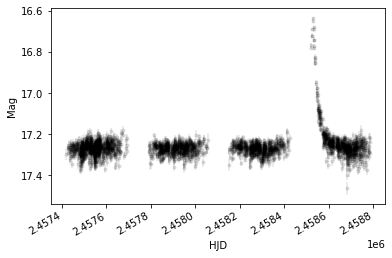

In [1]:

%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from astropy.visualization import hist as ahist

import corner
import astropy.table as at
import scipy.optimize as so
import pandas as pd

data = at.Table.read('data/phot.dat', format='ascii', names=['t','y','dy', 'seeing', 'sky'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(data['t'], data['y'], yerr=data['dy'],\
            linestyle='None', marker='.', color='k', alpha=0.1)
ax.invert_yaxis()
ax.set_xlabel('HJD')
ax.set_ylabel('Mag')
fig.autofmt_xdate()

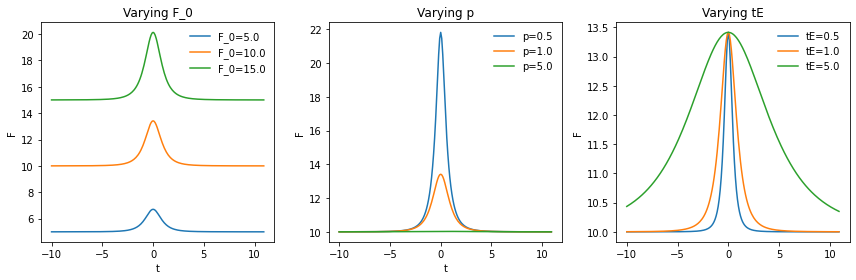

In [2]:
def model(F_0, p, tmax, tE, t):   
    u = np.sqrt(p**2 + ((t-tmax)/tE)**2) 
    F = F_0 *((u**2. + 2)/(u*np.sqrt(u**2 + 4)))
    return F

# before doing anything else, let's look at how this model behaves
# tmax is an easy parameter, so lets see what happens when we change one of the others
# holding the remaining fixed

tarr = np.arange(-10, 11, 0.1)
tmax = 0.
tE = 1
p = 1
F_0 = 10.

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12, 4))
ax1, ax2, ax3 = axs

for Fx in [5, 10, 15]:
    ax1.plot(tarr, model(Fx, p, tmax, tE, tarr), label=f'F_0={Fx:.1f}')
ax1.legend(frameon=False)
ax1.set_xlabel('t')
ax1.set_ylabel('F')
ax1.set_title('Varying F_0')

for px in [0.5, 1, 5]:
    ax2.plot(tarr, model(F_0, px, tmax, tE, tarr), label=f'p={px:.1f}')
ax2.legend(frameon=False)
ax2.set_xlabel('t')
ax2.set_ylabel('F')
ax2.set_title('Varying p')

for tx in [0.5, 1, 5]:
    ax3.plot(tarr, model(F_0, p, tmax, tx, tarr), label=f'tE={tx:.1f}')
ax3.legend(frameon=False)
ax2.set_xlabel('t')
ax3.set_ylabel('F')
ax3.set_title('Varying tE')

fig.tight_layout()

## The only annoying thing here is that the flux gets higher numerically as the source gets lensed, but the data are in magnitudes which get lower as the source gets lensed and I suggested that it was simpler to just work in magnitudes. So -2.5 log10 the model and recognize that -2.5 log10(F_0) = I_0 and we should be set.

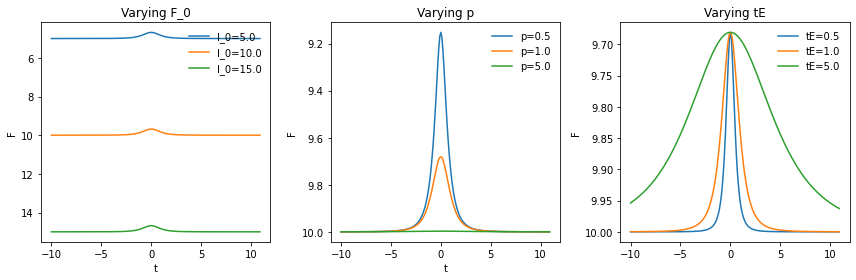

In [3]:
def logmodel(I_0, p, tmax, tE, t):   
    u = np.sqrt(p**2 + ((t-tmax)/tE)**2) 
    I = I_0 - 2.5*np.log10(((u**2. + 2)/(u*np.sqrt(u**2 + 4))))
    return I

tE = 1
p = 1
I_0 = 10.

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12, 4))
ax1, ax2, ax3 = axs

for Ix in [5, 10, 15]:
    ax1.plot(tarr, logmodel(Ix, p, tmax, tE, tarr), label=f'I_0={Ix:.1f}')
ax1.legend(frameon=False)
ax1.set_xlabel('t')
ax1.set_ylabel('F')
ax1.invert_yaxis()
ax1.set_title('Varying F_0')

for px in [0.5, 1, 5]:
    ax2.plot(tarr, logmodel(I_0, px, tmax, tE, tarr), label=f'p={px:.1f}')
ax2.legend(frameon=False)
ax2.set_xlabel('t')
ax2.set_ylabel('F')
ax2.invert_yaxis()
ax2.set_title('Varying p')

for tx in [0.5, 1, 5]:
    ax3.plot(tarr, logmodel(I_0, p, tmax, tx, tarr), label=f'tE={tx:.1f}')
ax3.legend(frameon=False)
ax2.set_xlabel('t')
ax3.set_ylabel('F')
ax3.set_title('Varying tE')
ax3.invert_yaxis()
fig.tight_layout()

## OK, so now we need a reasonable initial guess for our MCMC sampler


## I_0 is roughly the baseline level of the flux which for my real light curve looks like 17.25 ish

## p is something like a peak magnification. p of 0.5 seems to cause a 0.8 mag change, while p of 1 seems to cause a 0.25 mag change. Ours is somewhere in between so we'll try p=0.75

## tE is roughy the half-width at half-maximum. Our event seems to last roughly a 100 days FWHM, so we'll take half that as our initial guess.

## Finally, our peak looks somewhere around HJD=2458500.

## You can do way better with using some simple stats that you've already learned about this semester, but I'm deliberately winging it by doing this by eye... because you should *LOOK AT YOUR DATA!*

## Let's just look at those guesses vs the model.

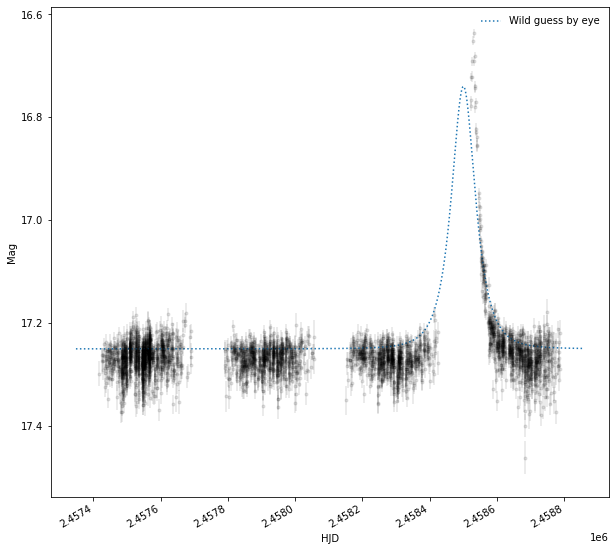

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.errorbar(data['t'], data['y'], yerr=data['dy'],\
            linestyle='None', marker='.', color='k', alpha=0.1)
ax.invert_yaxis()
tmin, tmax = ax.get_xlim()
tarr = np.arange(tmin, tmax+0.1, 0.1)
guess = [17.25, 0.75, 2458500, 50]
ax.plot(tarr, logmodel(*guess, tarr), ls=':', color='C0', label='Wild guess by eye')
ax.set_xlabel('HJD')
ax.set_ylabel('Mag')
ax.legend(frameon=False)
fig.autofmt_xdate()

## You could refine your guess as well 

## You already know how to do this with something simple like maximum likelihood!

## You also know how to get an initial estimate for reasonable step sizes in each direction - you'd like to step by roughly some factor of the variance of each of the parameters. 

## This is just the Hessian Inverse/Fisher Information, which scipy.optimize will kindly give us.

In [5]:
# we'll define a chisq function for scipy optimize
def chisq(x, *args):
    I_0, p, tmax, tE = x
    t, y, dy = args
    mod = logmodel(I_0, p, tmax, tE, t)
    chisq = np.sum(((y - mod)**2.)/(dy**2.))/(len(t) -4)
    return chisq
    
# and a log likelihood function for our Metropolis-Hastings implementation
def LogLikelihood(I_0, p, tmax, tE, t, y, dy):
    x = (I_0, p, tmax, tE)
    args = (t, y, dy)
    negLogLike = chisq(x, *args)
    return -negLogLike/2.

# we'll set some very loose bounds on each parameter
bounds = [(16, 18), (0, 2), (2458400, 2458600), (10, 60)]

# we need to pass the data to scipy.optimize
args = (data['t'], data['y'], data['dy'])

res = so.minimize(chisq, guess, args=args, bounds=bounds)
print(res)

# and we can use the Hessian inverse to set the step size for metropolis-hastings
# this choice is good because it should ensure we sample the distribution well.
sigmas = np.diag(res.hess_inv.todense())**0.5
print('Sigmas =', sigmas)

      fun: 3.4808890101473007
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.35367262e-04, 1.07469588e-05, 1.54404413e-06, 8.88178346e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 275
      nit: 45
     njev: 55
   status: 0
  success: True
        x: array([1.72653508e+01, 6.87406633e-01, 2.45852788e+06, 2.54557245e+01])
Sigmas = [4.64045969e-02 5.22371188e-01 5.25117721e+01 1.36681035e+01]


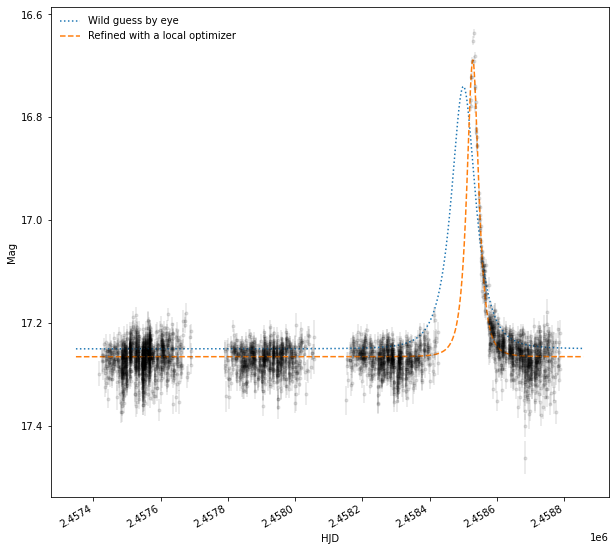

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.errorbar(data['t'], data['y'], yerr=data['dy'],\
            linestyle='None', marker='.', color='k', alpha=0.1)
ax.invert_yaxis()
tmin, tmax = ax.get_xlim()
tarr = np.arange(tmin, tmax+0.1, 0.1)
guess = [17.25, 0.75, 2458500, 50]
ax.plot(tarr, logmodel(*guess, tarr), ls=':', color='C0', label='Wild guess by eye')
ax.plot(tarr, logmodel(*res.x, tarr), ls='--', color='C1', label='Refined with a local optimizer')
ax.set_xlabel('HJD')
ax.set_ylabel('Mag')
ax.legend(frameon=False)
fig.autofmt_xdate()

## That's not terrible and we've still not actually started the actual problem!

In [7]:
def LogPrior(I_0, p, tmax, tE):

    # we can use the same bounds we used for scipy optimize as a prior
    if (I_0 >= 18  or I_0 <= 16) or\
        (p <= 0 or p >= 2)  or\
        (tE <= 10 or tE > 60) or\
        (tmax <= 2458400 or tmax >= 2458600):   
        return -np.inf
    
    # we can also make the priors non-trivial
    # we know the scipy optimze fit is reasonable
    # we also know we want the priors to be somewhat uninformative
    # so I'll make the widths very wide
    p_I0 = st.norm.pdf(I_0, loc=1.72653507e+01, scale=1.)
    p_p = st.norm.pdf(p, loc=6.87406601e-01, scale=1.)
    p_tmax = st.norm.pdf(tmax, loc=2.45852788e+06, scale=10.)
    p_tE = st.norm.pdf(tE, loc=2.54557543e+01, scale=10.)
    prior = p_I0*p_p*p_tmax*p_tE
    
    lnprior = np.log(prior)
    return lnprior

## Finally, we need the posterior - or really the log of the posterior for our work

In [8]:
def Posterior(I_0, p, tmax, tE, t, y, dy):

    lnlike = LogLikelihood(I_0, p, tmax, tE, t, y, dy)
    lnprior = LogPrior(I_0, p, tmax, tE)
    lnposterior = lnlike + lnprior
    return np.exp(lnposterior)


## And that's everything we need - I'll ignore the scipy optimize result other than for the step size and just start with my eyeball initial guess

In [9]:
def metropolis_hastings(p, x0, sigma, *args, nsamp=1000):
    
    ndim = len(x0)
    try:
        test_val = p(*x0, *args)
        if not np.isfinite(test_val):
            raise ValueError('Function at starting position is not finite')
        
        if test_val == 0.:
             raise ValueError('Function at starting position must be non-zero')
                
    except Exception as e:
        message = f'{e}\nCannot initialize sampler at this position'
        raise ValueError(message)
    
        
    # we need something to save the samples we want
    samples = np.zeros((nsamp, ndim))    

    x = np.array(x0)
    sigma = np.array(sigma)
    
    # the position and step size arrays had better be the same 
    assert x.shape == sigma.shape, 'Shape of x and shape of sigma must be the same'
    
    # while we want more samples
    for i in range(nsamp):

        # now we adjust the initial position a little
        # instead of explictly definition g(x|x') and g(x'|x)
        # we can recognize that a Gaussian is a stationary kernel
        # as we discussed in class, this is nice because 
        # all that matters is the absolute difference between x' and x
        # and if that's the case, then g(x'|x) = g(x|x')
        x_prime = x + sigma*np.random.randn(ndim)


        if np.random.rand() < (p(*x_prime, *args) / p(*x, *args)):
            x = x_prime
            
        # we save the sample to the chain
        samples[i] = x
    return samples

In [10]:
samples = metropolis_hastings(Posterior, guess, sigmas, *args, nsamp=10000)

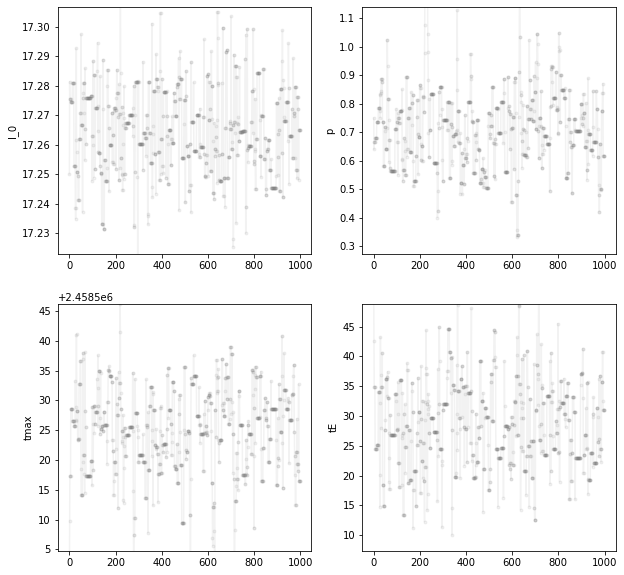

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
labels=['I_0', 'p', 'tmax', 'tE']
for i in range(samples.shape[1]):
    j, k = np.unravel_index(i, (2,2))
    ax = axs[j][k]
    ax.plot(samples[::10,i], linestyle='-', color='grey', marker='.', alpha=0.1)
    med = np.median(samples[:,i])
    std = np.std(samples[:,i])
    ax.set_ylim(med-3*std, med+3*std) 
    ax.set_ylabel(labels[i])

# It's hard to see what the burn-in is here because my initial guess by eye wasn't terrible, and we chose sigmas from scipy optimize's Hessian inverse - making sure we sample the posterior reasonably well.

# Let's discard 10% at the start as burnin. We'll also take every 10th sample to reduce the correlation between samples on the chains (see lecture 6 for thinning)


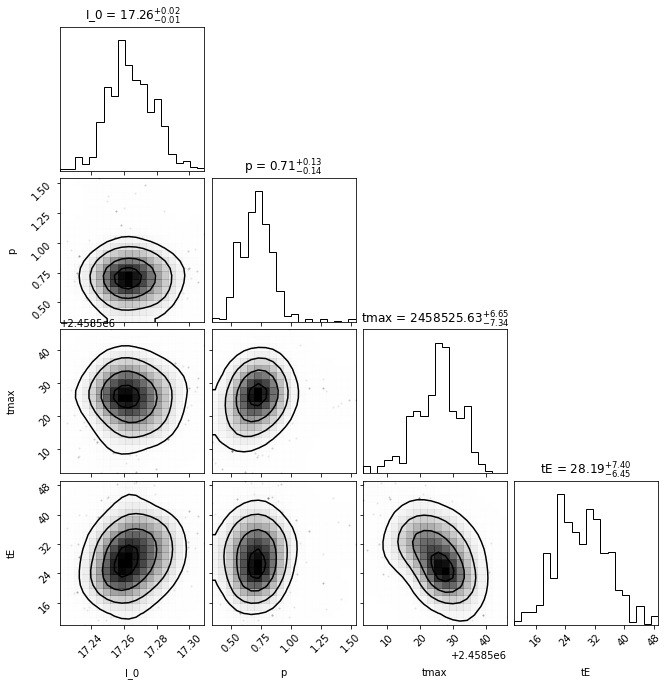

In [14]:
fig = corner.corner(samples[1000::10,:], plot_contours=True, show_titles=True, smooth=2, labels=labels)

In [15]:
# You have all the samples so you can ask for the 16 and 84th percentile to set uncertainties
mcmc_res = np.percentile(samples[1000::10,:], [50, 16, 84], axis=0)

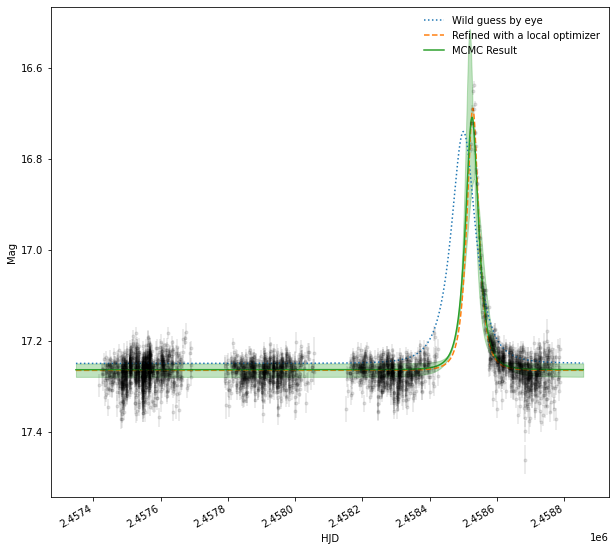

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.errorbar(data['t'], data['y'], yerr=data['dy'],\
            linestyle='None', marker='.', color='k', alpha=0.1)
ax.invert_yaxis()
tmin, tmax = ax.get_xlim()
tarr = np.arange(tmin, tmax+0.1, 0.1)
guess = [17.25, 0.75, 2458500, 50]
ax.plot(tarr, logmodel(*guess, tarr), ls=':', color='C0', label='Wild guess by eye')
ax.plot(tarr, logmodel(*res.x, tarr), ls='--', color='C1', label='Refined with a local optimizer')
ax.fill_between(tarr, logmodel(*mcmc_res[1], tarr), logmodel(*mcmc_res[2], tarr),\
                    color='C2', alpha=0.3)
ax.plot(tarr, logmodel(*mcmc_res[0], tarr), ls='-', color='C2', label='MCMC Result')
ax.set_xlabel('HJD')
ax.set_ylabel('Mag')
ax.legend(frameon=False)
fig.autofmt_xdate()